# Learning Objectives

Climate change is one of the effects of the rapid economic growth that has occurred in most countries since the Industrial Revolution. It is an important issue for policymaking, since governments need to assess how serious the problem is and then decide how to mitigate it.


Suppose you are a policy advisor for a small island nation. The government would like to know more about the extent of climate change and its possible causes. They ask you the following questions:

    How can we tell whether climate change is actually happening or not?
    If it is real, how can we measure the extent of climate change and determine what is causing it?

To answer the first question, we look at the behaviour of environmental variables over time to see whether there are general patterns in environmental conditions that could be indicative of climate change. In this project, we focus on temperature-related variables.

To answer the second question, we examine the degree of association between temperature and another variable, CO2 emissions, and consider whether there is a plausible relationship between the two, or whether there are other explanations for what we observe.

---
# Getting Started With Python

In [1]:
# Install non-built in colab packages
# To hide the code cell outputs we use the following:
%%capture
!pip install pingouin
!pip install lets_plot

UsageError: Line magic function `%%capture` not found.


In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path    # provides convenient shorthand methods for reading
                            # files as either text or raw bytes
import pingouin as pg       # A statistical library
from lets_plot import *     # Provides additional plotting functionality

LetsPlot.setup_html(no_js=True)

# Set the plot style for prettier charts:
plt.style.use(
    "https://raw.githubusercontent.com/aeturrell/core_python/main/plot_style.txt"
)


---

# Part 1.1 The behaviour of average surface temperature over time

In the questions below, we look at data from NASA about land–ocean temperature anomalies in the northern hemisphere.


**Q. What are temperature anomalies (and why prefer them to absolute temperatures)?**

**A.** Temperature anomalies indicate how much warmer or colder it is than normal for a particular place and time. For the GISS analysis, normal always means the average over the 30-year period 1951-1980 for that place and time of year.

Finding absolute regional means encounters significant difficulties that create large uncertainties. This is why the GISS analysis deals with anomalies rather than absolute temperatures.


## The temperature anomaly dataset

In [ ]:
# Import the temp anomaly dataset
df = pd.read_csv(
    "https://data.giss.nasa.gov/gistemp/tabledata_v4/NH.Ts+dSST.csv",
    skiprows = 1,                 # skip the first row
    na_values = "***"             # recognize the non-missing temp data
)

In [ ]:
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.36,-0.52,-0.23,-0.30,-0.07,-0.17,-0.20,-0.27,-0.24,-0.32,-0.44,-0.40,-0.29,NaN,NaN,-0.20,-0.21,-0.33
1,1881,-0.32,-0.23,-0.05,-0.01,0.02,-0.35,0.06,-0.06,-0.28,-0.45,-0.38,-0.24,-0.19,-0.20,-0.32,-0.01,-0.12,-0.37
2,1882,0.25,0.20,0.00,-0.33,-0.26,-0.32,-0.29,-0.16,-0.26,-0.54,-0.34,-0.69,-0.23,-0.19,0.07,-0.19,-0.26,-0.38
3,1883,-0.59,-0.68,-0.16,-0.30,-0.25,-0.14,-0.05,-0.23,-0.33,-0.17,-0.43,-0.16,-0.29,-0.33,-0.65,-0.24,-0.14,-0.31
4,1884,-0.18,-0.12,-0.65,-0.60,-0.37,-0.43,-0.42,-0.53,-0.46,-0.46,-0.59,-0.48,-0.44,-0.41,-0.16,-0.54,-0.46,-0.50


In [ ]:
# See the df's structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    146 non-null    int64  
 1   Jan     146 non-null    float64
 2   Feb     146 non-null    float64
 3   Mar     146 non-null    float64
 4   Apr     146 non-null    float64
 5   May     145 non-null    float64
 6   Jun     145 non-null    float64
 7   Jul     145 non-null    float64
 8   Aug     145 non-null    float64
 9   Sep     145 non-null    float64
 10  Oct     145 non-null    float64
 11  Nov     145 non-null    float64
 12  Dec     145 non-null    float64
 13  J-D     145 non-null    float64
 14  D-N     144 non-null    float64
 15  DJF     145 non-null    float64
 16  MAM     145 non-null    float64
 17  JJA     145 non-null    float64
 18  SON     145 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 21.8 KB


## Drawing a line chart of temperature and time

We set the year as the index of the dataset since Python recognizes each variable as a series of numbers, but these numbers corespond to the same variable of different time periods.

In [ ]:
df = df.set_index("Year")
df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
Year,,,,,,,,,,,,,,,,,,
1880,-0.36,-0.52,-0.23,-0.30,-0.07,-0.17,-0.20,-0.27,-0.24,-0.32,-0.44,-0.40,-0.29,NaN,NaN,-0.20,-0.21,-0.33
1881,-0.32,-0.23,-0.05,-0.01,0.02,-0.35,0.06,-0.06,-0.28,-0.45,-0.38,-0.24,-0.19,-0.20,-0.32,-0.01,-0.12,-0.37
1882,0.25,0.20,0.00,-0.33,-0.26,-0.32,-0.29,-0.16,-0.26,-0.54,-0.34,-0.69,-0.23,-0.19,0.07,-0.19,-0.26,-0.38
1883,-0.59,-0.68,-0.16,-0.30,-0.25,-0.14,-0.05,-0.23,-0.33,-0.17,-0.43,-0.16,-0.29,-0.33,-0.65,-0.24,-0.14,-0.31
1884,-0.18,-0.12,-0.65,-0.60,-0.37,-0.43,-0.42,-0.53,-0.46,-0.46,-0.59,-0.48,-0.44,-0.41,-0.16,-0.54,-0.46,-0.50


In [ ]:
# Last 5 years observations
df.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
Year,,,,,,,,,,,,,,,,,,
2021,1.26,0.95,1.21,1.13,1.05,1.21,1.08,1.03,1.05,1.30,1.29,1.17,1.14,1.15,1.13,1.13,1.11,1.21
2022,1.24,1.16,1.41,1.09,1.02,1.13,1.07,1.17,1.15,1.31,1.10,1.06,1.16,1.17,1.19,1.17,1.12,1.19
2023,1.29,1.29,1.64,1.02,1.13,1.20,1.45,1.57,1.67,1.87,1.98,1.85,1.50,1.43,1.21,1.26,1.40,1.84
2024,1.68,1.92,1.77,1.79,1.44,1.54,1.42,1.43,1.58,1.73,1.89,1.71,1.66,1.67,1.82,1.67,1.46,1.73
2025,1.83,1.62,1.82,1.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.72,NaN,NaN,NaN


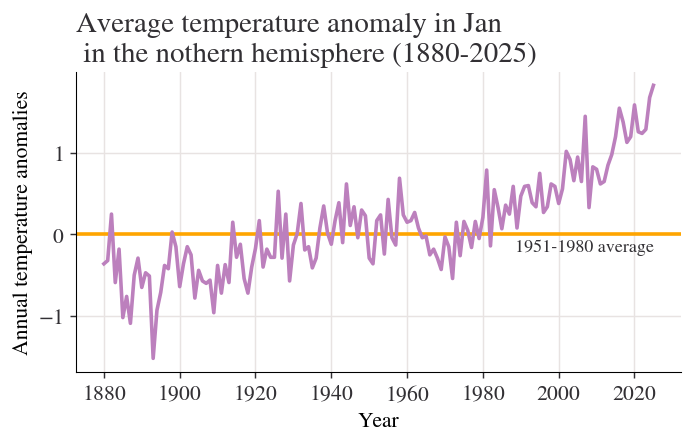

In [ ]:
# Drawing a line chart using data for January
month = "Jan"

# create a figure (a bit like a canvas) and an axis (ax)
# onto which to put chart elements
fig, ax = plt.subplots(dpi = 130)

ax.axhline(0, color = "orange") # average temperature from 1951 to 1980

ax.annotate("1951-1980 average", xy = (0.66, -0.2), xycoords = ("figure fraction", "data"))

df[month].plot(ax = ax) # we do not specifiy the horizontal axis since we set the
# Year variable as our index

ax.set_title(
    f"Average temperature anomaly in {month} \n in the nothern hemisphere (1880-{df.index.max()})"
)

ax.set_ylabel("Annual temperature anomalies");

## Plotting for Seasonal Periods



- MAM: March April May (Spring)
- JJA: June July August (Summer)
- SON: September October November (Fall)
- DJF: December January Feburary (Winter)


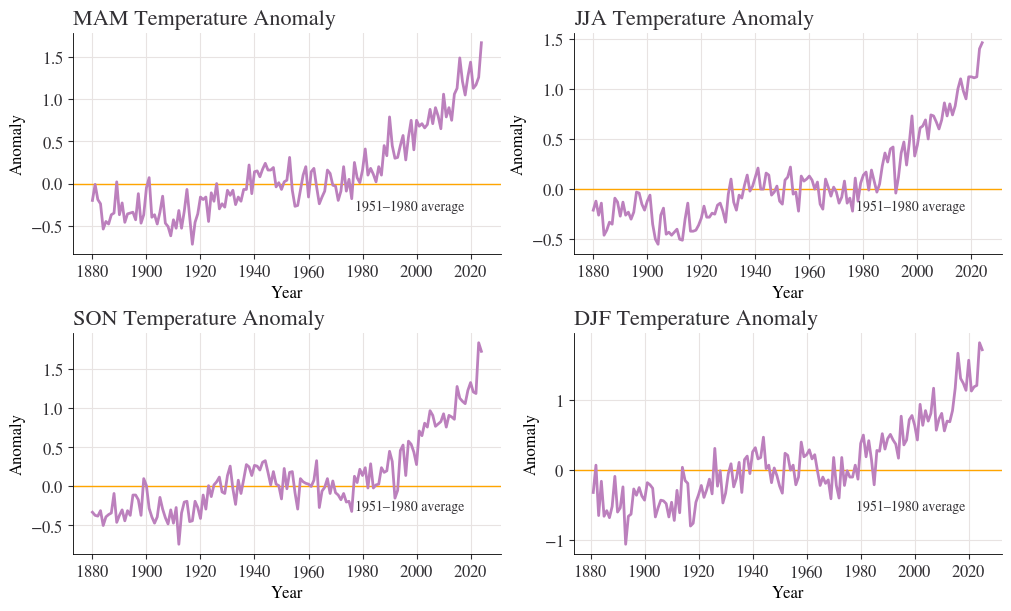

In [ ]:
seasons = ["MAM", "JJA", "SON", "DJF"]

fig, axes = plt.subplots(2, 2, figsize=(10, 6), dpi=100, constrained_layout=True)
axes = axes.flatten()

for i, season in enumerate(seasons):
    ax = axes[i]

    ax.axhline(0, color="orange", linewidth=1)
    ax.annotate("1951–1980 average", xy=(0.66, 0.2), xycoords="axes fraction")

    df[season].plot(ax = ax)

    ax.set_title(f"{season} Temperature Anomaly")
    ax.set_ylabel("Anomaly")
    ax.set_xlabel("Year")

plt.show();

## Producing a line chart for the annual temperature anomalies

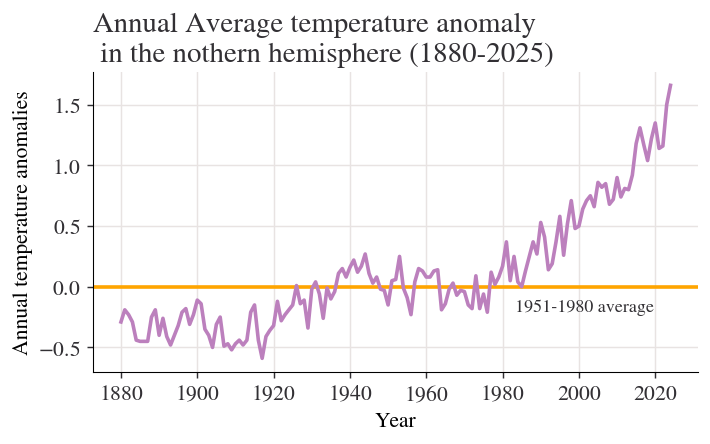

In [ ]:
fig, ax = plt.subplots(dpi = 130)

ax.axhline(0, color = "orange") # average temperature from 1951 to 1980

ax.annotate("1951-1980 average", xy = (0.66, -0.2), xycoords = ("figure fraction", "data"))

df["J-D"].plot(ax = ax)

ax.set_title(
    f"Annual Average temperature anomaly \n in the nothern hemisphere (1880-{df.index.max()})"
)

ax.set_ylabel("Annual temperature anomalies");

**Q. What do your charts from previous questions suggest about the relationship between temperature and time?**

**A.** The temperature anomalies are increasing over time. The average temperature anomaly initally fluctuatued around 1880 and 1920, and then fluctuated around a higher mean value until 1975. From about 1975, temperature anomalies were positive and displayed an increasing trend. The overall positive relationship between temperature and time shown by the charts provides evidence to support the presence of global warming.

<br>

**Q. For each time interval, discuss what we can learn about patterns in temperature over time that we might not be able to learn from the charts of other time intervals.**

**A.** Since we are concerned with identifying the general trend regarding the global warming, it is vital to look for the same variable over time. Longer periods (year and decades) help us to observe the long-term trend and seasonal and monthly charts help us see the short-term fluctuations. Also we could see if the rising annual average temperatures are due to temperatures rising only in a few months, or due to temperatures rising in all months.

<br>

Now let's compare the chart obtained in question 4 to the following figure which is from the National Academy of Sicneces.

![image.png](https://www.core-econ.org/doing-economics/book/images/web/r-figure-01-04.jpg)

(a) The horizontal axis variable for both figures is time (Year), the difference is the length of them. The one that we generated is from 1880 until 2025 but the other figure is over a much longer period (from 1000 - 2000).

The vertical axes are slightly different, one figure uses the deviation from the mean temperature in 1951–1980, while the other(National Academy of Siences) uses deviation from the mean temperature in 1961–1990.

(b) Both charts show a similar pattern in temperature anomalies from 1880 up until now. Unusual behaviors can be seen for example from 1300-1450 and also some periods before the industrial revolution.

(c) Taken together, the charts suggest that there are probably many reasons for temperature fluctuations (not just human activity), but that temperatures have increased since the 1980s, to levels never seen in the past millennium. The government should therefore be concerned about climate change.


---
# Part 1.2 Variation in temperature over time

Will weather become more extreme and vary more as a result of climate change?

We are now going to create similar charts of temperature distributions to the ones in the [New York Times article](https://www.nytimes.com/2022/04/28/learning/whats-going-on-in-this-graph-may-4-2022.html), and look at different ways of summarizing distributions.

## Creating frequency tables and histograms

In [ ]:
# using pd.cut, we categorize the index of a df into time periods.
df["Period"] = pd.cut(
    df.index,
    bins = [1921, 1950, 1980, 2010],
    labels = ["1921-1950", "1951-1980", "1981-2010"],
    ordered = True
)

In [ ]:
# pd.cut() automatically assigns NaN for those observations that are not in our periods
df["Period"].tail(20)

,Period
Year,
2006,1981-2010
2007,1981-2010
2008,1981-2010
2009,1981-2010
2010,1981-2010
2011,NaN
2012,NaN
2013,NaN
2014,NaN


In [ ]:
# using stack() we transform the df from wide to long format.
# It moves column labels into the row index, creating a series with a multi-index:
# one for the original index and one for the column name.
list_of_months = ["Jun", "Jul", "Aug"]
df[list_of_months].stack().head()

Year     
1880  Jun   -0.17
      Jul   -0.20
      Aug   -0.27
1881  Jun   -0.35
      Jul    0.06
dtype: float64

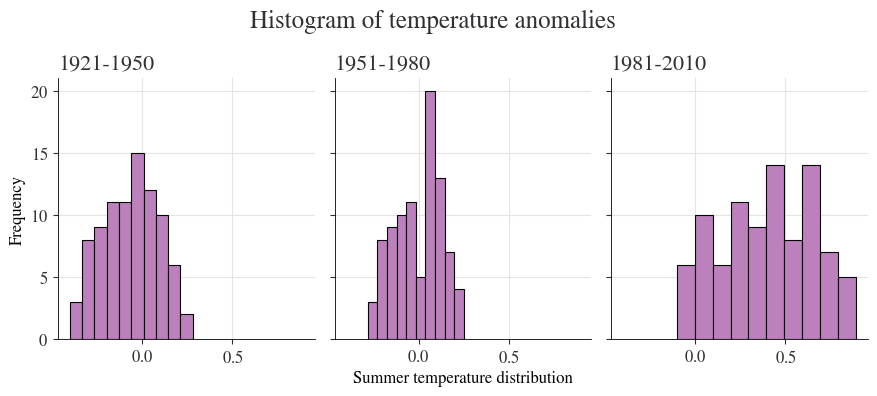

In [ ]:
fig, axes = plt.subplots(ncols = 3, figsize = (9, 4), dpi = 100, sharex = True, sharey = True)

for ax, period in zip(axes, df["Period"].dropna().unique()):
  df.loc[df["Period"] == period, list_of_months].stack().hist(ax = ax)
  ax.set_title(period)

plt.suptitle(
    "Histogram of temperature anomalies"
)
axes[0].set_ylabel("Frequency")
axes[1].set_xlabel("Summer temperature distribution")
plt.tight_layout(); # adjust spacing

To explain what a histogram displays, The height of the bar over each interval represents the count of the number of anomalies that fall in the interval. The bar with the greatest height indicates the most frequently encountered temperature interval.

As you can see from the earlier data, there are virtually no temperature anomalies larger than 0.3. The height of these bars gives a useful overview of the distribution of the temperature anomalies.

Now consider how this distribution changes as we move through the three distinct time periods. <mark> The distribution is clearly moving to the right for the period 1981–2010 </mark>, which is an indication that the temperature is increasing; in other words, an indication of global warming.


## Using the np.quantile function

In [ ]:
# 30x12 df, 30 years and 12 months of data
temp_all_months = df.loc[(df.index >= 1951) & (df.index <= 1980), "Jan":"Dec"]

temp_all_months = (
    temp_all_months.stack()
    .reset_index()
    .rename(columns={"level_1": "month", 0: "values"})
)

temp_all_months

,Year,month,values
0,1951,Jan,-0.36
1,1951,Feb,-0.51
2,1951,Mar,-0.18
3,1951,Apr,0.07
4,1951,May,0.17
...,...,...,...
355,1980,Aug,0.09
356,1980,Sep,0.10
357,1980,Oct,0.11
358,1980,Nov,0.20


In [ ]:
# we use the output as our normal hot-cold threshold
quantiles = [0.3, 0.7]
list_of_percentiles = np.quantile(temp_all_months["values"], q = quantiles)

print(f"The cold threshold of {quantiles[0] * 100}% is {list_of_percentiles[0]}")
print(f"The hot threshold of {quantiles[1] * 100}% is {list_of_percentiles[1]}")

The cold threshold of 30.0% is -0.1
The hot threshold of 70.0% is 0.1


In [ ]:
temp_all_months = df.loc[(df.index >= 1981) & (df.index <= 2010), "Jan":"Dec"]

temp_all_months = (
    temp_all_months.stack()
    .reset_index()
    .rename(columns={"level_1": "month", 0: "values"})
)

temp_all_months.head()

,Year,month,values
0,1981,Jan,0.79
1,1981,Feb,0.62
2,1981,Mar,0.67
3,1981,Apr,0.39
4,1981,May,0.18


In [ ]:
entries_less_than_q30 = temp_all_months["values"] < list_of_percentiles[0]
proportion_under_q30 = entries_less_than_q30.mean()

print(
    f"The proportion under {list_of_percentiles[0]} is {proportion_under_q30*100:.2f}%"
)

The proportion under -0.1 is 1.94%


In [ ]:
entries_over_than_q70 = temp_all_months["values"] > list_of_percentiles[1]
proportion_over_q70 = entries_over_than_q70.mean()

print(
    f"The proportion over {list_of_percentiles[1]} is {proportion_over_q70*100:.2f}%"
)


The proportion over 0.1 is 84.44%


**Q. Does your answer suggest that we are experiencing hotter weather more frequently in 1981–2010?**

**A.** We see that 30% of temperatures were considered "hot" in 1951-1980 and this number almost trippled in the next 30-year period from 1981 to 2010, this clearly suggest that we are experiencing hotter weather more frequently.


## Calculating and understanding mean and variance

In [ ]:
temp_all_months = (
    df.loc[:, "DJF":"SON"]
    .stack()
    .reset_index()
    .rename(columns={"level_1": "Season", 0: "Values"})
)
temp_all_months["Period"] = pd.cut(
    temp_all_months["Year"],
    bins=[1921, 1950, 1980, 2010],
    labels=["1921—1950", "1951—1980", "1981—2010"],
    ordered=True,
)

temp_all_months.iloc[-135:-125]

,Year,Season,Values,Period
445,1991,JJA,0.42,1981—2010
446,1991,SON,0.32,1981—2010
447,1992,DJF,0.43,1981—2010
448,1992,MAM,0.30,1981—2010
449,1992,JJA,-0.04,1981—2010
450,1992,SON,-0.15,1981—2010
451,1993,DJF,0.37,1981—2010
452,1993,MAM,0.31,1981—2010
453,1993,JJA,0.12,1981—2010
454,1993,SON,-0.05,1981—2010


In [ ]:
grp_mean_var = temp_all_months.groupby(["Season", "Period"], observed = True)["Values"].agg(
    ["mean", "var"]
)
grp_mean_var

mean       var
Season Period                       
DJF    1921—1950 -0.037241  0.057521
       1951—1980 -0.002667  0.050420
       1981—2010  0.523333  0.079692
JJA    1921—1950 -0.063793  0.021967
       1951—1980  0.000667  0.014593
       1981—2010  0.398667  0.067929
MAM    1921—1950 -0.052414  0.032026
       1951—1980  0.000667  0.025427
       1981—2010  0.508333  0.076035
SON    1921—1950  0.074828  0.027833
       1951—1980 -0.001333  0.026384
       1981—2010  0.428000  0.111596

The mean is increasing over the three period reaching its highest value in 1981-2010 period. On the other hand, the variances seem to remain fairly constant across the first two periods, but they do increase markedly for the 1981–2010 period.

Now let's create a time-series plot comparing winter and summer.

In [ ]:
min_year = 1880
(
    ggplot(temp_all_months, aes(x="Year", y="Values", color="Season"))
    + geom_abline(slope=0, color="black", size=1)
    + geom_line(size=1)
    + labs(
        title=f"Average annual temperature anomaly in \n the northern hemisphere ({min_year}—{temp_all_months['Year'].max()})",
        y="Annual temperature anomalies",
    )
    + scale_x_continuous(format="d")
    + geom_text(
        x=min_year, y=0.1, label="1951—1980 average", hjust="left", color="black"
    )
)

**Q. Does temperature appear to be more variable over time. Would you advise the government to spend more money on mitigating the effects of extreme weather events?**

**A.** Yes we can observe that the temperature appears to be more variable recently and there is a high chance of extrem and unusual weather events. Based on the facts, I would advise the government to allocate more money and resources to try to diminish th effects of extreme weather circumstances.




---

# Part 1.3 Carbon emissions and the environment

We are now going to look at carbon emissions over time, and use the scatterplot to show their relationship to temperature anomalies.


**Q. The CO2 data was recorded from one observatory in Mauna Loa. Using [an Earth System Research Laboratory article](https://tinyco.re/8193893) as a reference, explain whether or not you think this data is a reliable representation of the global atmosphere.**

**A.** Based on the article of the Global Monitoring Laboratory, they have confidence that the CO2 measurments made at the Mauna Loa Observatory reflect truth about the global atmosphere, but why?
1. The Observatory near the summit of Mauna Loa, at an altitude of 3400m, is well situated to measure the air masses that are representative of very large areas.
2. All of the measurements are rigorously and very frequently calibrated.
3. Ongoing comparisons of independent measurments at the same site allow an estimate of the accuracy, which is generally better than 0.2 ppm.


**Q. The variables trend and interpolated are similar, but not identical. In your own words, explain the difference between these two measures of CO2 levels. Why might there be seasonal variation in CO2 levels?**

**A.** Interpolated CO2, as the name suggest, is the  data filled by the NOAA in missing data points to show actual short-term values.
On the other hand, Trend CO2 smooths out short-term fluctuations to show the long-term pattern.
Seasonal variation happens because in the spring and summer plants absorbs the CO2 and lowers the amount of CO2.

## Scatterplot and correlation coefficient

In [ ]:
df_co2 = pd.read_excel("/content/drive/MyDrive/Google Colab/Doing Economics/doing-economics-datasets/CO2-DATA-NOAA.xlsx")

df_co2.head()

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Year,Month,Monthly average,Interpolated,Trend
0,1958,3,315.71,315.71,314.62
1,1958,4,317.45,317.45,315.29
2,1958,5,317.50,317.50,314.71
3,1958,6,-99.99,317.10,314.85
4,1958,7,315.86,315.86,314.98


### Merging the temperature data and the CO2 data

Choose one month and add the CO2 trend data to the temperature dataset from Part 1.1, making sure that the data corresponds to the correct year.


In [ ]:
df_co2_june = df_co2.loc[df_co2["Month"] == 6]

df_co2_june.head()

,Year,Month,Monthly average,Interpolated,Trend
3,1958,6,-99.99,317.10,314.85
15,1959,6,318.15,318.15,315.92
27,1960,6,319.59,319.59,317.36
39,1961,6,319.77,319.77,317.48
51,1962,6,320.55,320.55,318.27


In [ ]:
df_temp_co2 = pd.merge(df_co2_june, df, on = "Year")

df_temp_co2[["Year", "Jun", "Trend"]].head()

,Year,Jun,Trend
0,1958,0.05,314.85
1,1959,0.14,315.92
2,1960,0.18,317.36
3,1961,0.18,317.48
4,1962,-0.13,318.27


In [ ]:
# Using ggplot2 again for plotting the scatterplot
(
    ggplot(df_temp_co2, aes(x="Jun", y="Trend"))
    + geom_point(color="black", size=3)
    + labs(
        title="Scatterplot of temperature anomalies vs carbon dioxide emissions",
        y="Carbon dioxide levels (trend, mole fraction)",
        x="Temperature anomaly (degrees Celsius)",
    )
)

## The correlation coefficient

The formula for Pearson's correlation coefficient \( r \) is:

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$$

Where:
- $x_i,y_i$ are the individual sample points of the variables x and y.
- $\bar{x},\bar{y}$ are the means

Interpretation of the coefficient:
* r = 1: Perfect positive correlation
* r = -1: Perfect negative correlation
* r = 0: No correlation

In [ ]:
df_temp_co2[["Jun", "Trend"]].corr(method = "pearson")

,Jun,Trend
Jun,1.000000,0.914877
Trend,0.914877,1.000000


0.92 suggests a positive and strong relationship between the two variables (higher temperature anomalies are associated with higher CO2 levels).

However, this correlation measure only tells us about the strength of the upward or downward sloping linear relationship between two variables. It cannot tell us if the two variables have different kind of relationship.

In [ ]:
(
    ggplot(df_temp_co2, aes(x="Year", y="Jun"))
    + geom_line(size=1)
    + labs(
        title="June temperature anomalies",
    )
    + scale_x_continuous(format="d")
)

In [ ]:
base_plot = ggplot(df_temp_co2) + scale_x_continuous(format="d")
plot_p = (
    base_plot
    + geom_line(aes(x="Year", y="Jun"), size=1)
    + labs(title="June temperature anomalies")
)
plot_q = (
    base_plot
    + geom_line(aes(x="Year", y="Trend"), size=1)
    + labs(title="Carbon dioxide emissions")
)
gggrid([plot_p, plot_q], ncol=2)

This line graph not only shows how the two variables move together in general, but also clearly demonstrates that both variables display a clear upward trend over the sample period. This is an important feature of many (not all) time series variables, and is important for the interpretation.

## Spurious Correlation

Even though two variables were strongly correlated with each other, we cannot conclude that one causes the other (causation). This two variables could be spuriously correlated.

*spurious correlation:* A strong linear association between two variables that does not result from any direct relationship, but instead may be due to coincidence or to another unseen factor.

For example, statistics show that men who are married have longer life expectancy. In the first look, we can conclude that marriage causes more life expectancy for men. However, this is not a causal relation, but rather a correlation. Wealthier men are more likely to get married and this is the underlying factor causing more life expectancy.

[Number of websites on the internet correlates with Total wind power generated globally](https://tylervigen.com/spurious/correlation/5236_number-of-websites-on-the-internet_correlates-with_total-wind-power-generated-globally)

AI explanation:

As the internet expanded, it created a surge in cat video consumption. This led to an increase in laughter around the world, which in turn resulted in stronger and more frequent gusts of wind, ultimately boosting the total wind power generated globally. Remember, laughter is truly the best renewable energy source! 😂

---

**Conclusion: Generally, do not be tempted to conclude that there is a causal link just because a high correlation coefficient can be seen. Be very cautious when attaching too much meaning to high correlation coefficients when the data displays trending behaviour.**

---
